# Single feature model

- [Feature Selection in Machine Learning Book](https://www.trainindata.com/p/feature-selection-in-machine-learning-book)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer, fetch_california_housing
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import roc_auc_score, mean_squared_error

from feature_engine.selection import SelectBySingleFeaturePerformance

# Classification

In [2]:
# load dataset

X, y = load_breast_cancer(return_X_y=True, as_frame=True)

# Separate data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

X_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
293,11.85,17.46,75.54,432.7,0.08372,0.05642,0.026880,0.022800,0.1875,0.05715,...,13.06,25.75,84.35,517.8,0.1369,0.17580,0.13160,0.09140,0.3101,0.07007
332,11.22,19.86,71.94,387.3,0.10540,0.06779,0.005006,0.007583,0.1940,0.06028,...,11.98,25.78,76.91,436.1,0.1424,0.09669,0.01335,0.02022,0.3292,0.06522
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.144000,0.097910,0.1752,0.05533,...,23.69,38.25,155.00,1731.0,0.1166,0.19220,0.32150,0.16280,0.2572,0.06637
278,13.59,17.84,86.24,572.3,0.07948,0.04052,0.019970,0.012380,0.1573,0.05520,...,15.50,26.10,98.91,739.1,0.1050,0.07622,0.10600,0.05185,0.2335,0.06263
489,16.69,20.20,107.10,857.6,0.07497,0.07112,0.036490,0.023070,0.1846,0.05325,...,19.18,26.56,127.30,1084.0,0.1009,0.29200,0.24770,0.08737,0.4677,0.07623


## Feature-engine

In [3]:
sel = SelectBySingleFeaturePerformance(
    estimator=DecisionTreeClassifier(random_state=10),
    scoring='roc_auc',
    cv=3,
    threshold=None,
)

sel.fit(X_train, y_train)

SelectBySingleFeaturePerformance(estimator=DecisionTreeClassifier(random_state=10))

In [4]:
# the features to drop

sel.features_to_drop_

['mean texture',
 'mean smoothness',
 'mean symmetry',
 'mean fractal dimension',
 'texture error',
 'smoothness error',
 'compactness error',
 'concavity error',
 'concave points error',
 'symmetry error',
 'fractal dimension error',
 'worst texture',
 'worst smoothness',
 'worst symmetry',
 'worst fractal dimension']

In [5]:
sel.feature_performance_

{'mean radius': np.float64(0.8051021129248817),
 'mean texture': np.float64(0.603808918097661),
 'mean perimeter': np.float64(0.8171860645890751),
 'mean area': np.float64(0.8124867500529999),
 'mean smoothness': np.float64(0.6064235743057028),
 'mean compactness': np.float64(0.7132004805314112),
 'mean concavity': np.float64(0.7906155042046499),
 'mean concave points': np.float64(0.8486679386615789),
 'mean symmetry': np.float64(0.5672037311850753),
 'mean fractal dimension': np.float64(0.5348031941205569),
 'radius error': np.float64(0.7361317221397782),
 'texture error': np.float64(0.48441806232775075),
 'perimeter error': np.float64(0.7451416860999224),
 'area error': np.float64(0.7631262808282101),
 'smoothness error': np.float64(0.5168539325842696),
 'compactness error': np.float64(0.5755423644972087),
 'concavity error': np.float64(0.6033142534096531),
 'concave points error': np.float64(0.6228181753939651),
 'symmetry error': np.float64(0.5144512755282312),
 'fractal dimension 

In [6]:
sel.feature_performance_std_

{'mean radius': np.float64(0.01619964238671276),
 'mean texture': np.float64(0.017829018048097646),
 'mean perimeter': np.float64(0.032604745140086044),
 'mean area': np.float64(0.017878664980592367),
 'mean smoothness': np.float64(0.01953097919513281),
 'mean compactness': np.float64(0.0362930880383841),
 'mean concavity': np.float64(0.011558761123656296),
 'mean concave points': np.float64(0.03128326672622833),
 'mean symmetry': np.float64(0.015997158770331525),
 'mean fractal dimension': np.float64(0.02655161842468518),
 'radius error': np.float64(0.027163527446792114),
 'texture error': np.float64(0.018660943620689725),
 'perimeter error': np.float64(0.03558117345885875),
 'area error': np.float64(0.0092186457982406),
 'smoothness error': np.float64(0.015043228385997549),
 'compactness error': np.float64(0.027518591461539163),
 'concavity error': np.float64(0.053296416284582725),
 'concave points error': np.float64(0.032242733198683725),
 'symmetry error': np.float64(0.011851218219

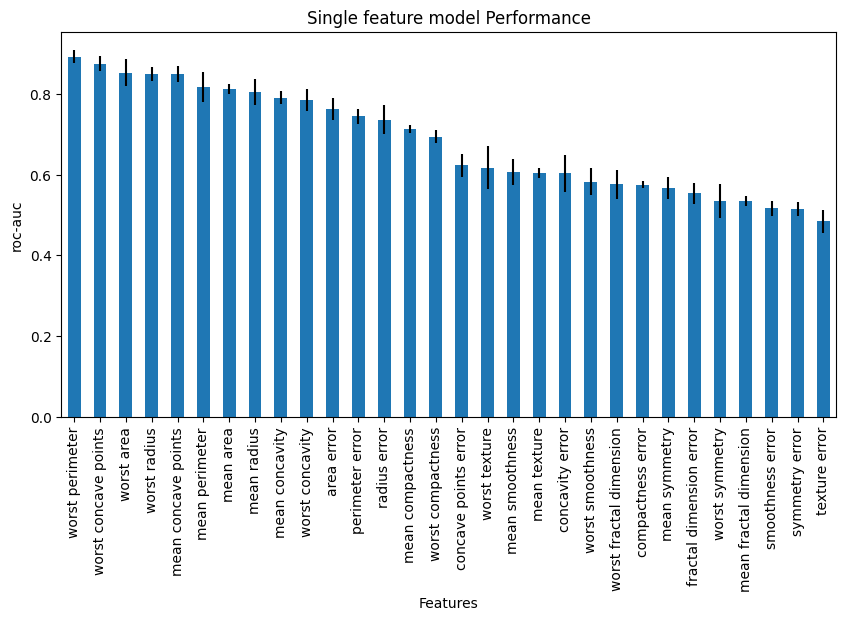

In [7]:
r = pd.concat([
        pd.Series(sel.feature_performance_),
        pd.Series(sel.feature_performance_std_)
    ], axis=1
)
r.columns = ['mean', 'std']

r.sort_values(by="mean", ascending=False)['mean'].plot.bar(
    yerr=[r['std'], r['std']], subplots=True, figsize=(10,5))

plt.title("Single feature model Performance")
plt.ylabel('roc-auc')
plt.xlabel('Features')
plt.show()

In [8]:
# drop features

X_train_t = sel.transform(X_train)
X_test_t = sel.transform(X_test)

X_train_t.shape, X_test_t.shape

((426, 15), (143, 15))

## Manually

In [9]:
# here we store the roc-auc values
roc_values = []

# iterate over each feature in the dataset
for feature in X_train.columns:

    # train a decision tree classifier
    clf = DecisionTreeClassifier(random_state=0)
    clf.fit(X_train[feature].to_frame(), y_train)

    # obtain the predictions
    y_scored = clf.predict_proba(X_test[feature].to_frame())

    # calculate and store the roc-auc
    roc_values.append(roc_auc_score(y_test, y_scored[:, 1]))
    
# display the result
roc_values[0:10]

[np.float64(0.8463312368972746),
 np.float64(0.5570230607966458),
 np.float64(0.8484276729559749),
 np.float64(0.8561844863731657),
 np.float64(0.5912997903563941),
 np.float64(0.7340670859538784),
 np.float64(0.8773584905660378),
 np.float64(0.850104821802935),
 np.float64(0.5628930817610063),
 np.float64(0.4763102725366876)]

Text(0.5, 1.0, 'Univariate performance')

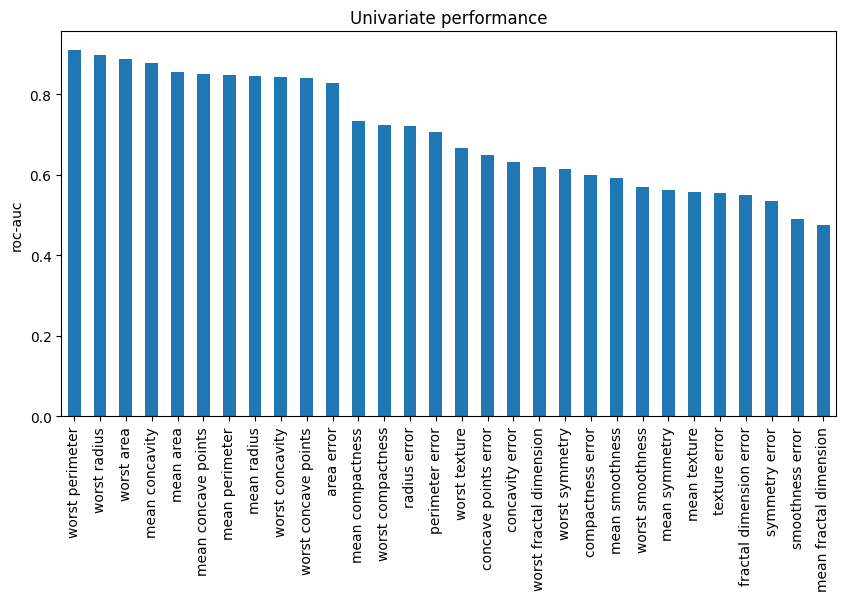

In [10]:
# now let's:

# 1) capture the roc-auc values in a pandas series
# 2) add the variable names in the index
# 3) sort the features based on the roc-auc
# 4) and make a var plot

roc_values = pd.Series(roc_values)
roc_values.index = X_train.columns
roc_values.sort_values(ascending=False).plot.bar(figsize=(10, 5))
plt.ylabel('roc-auc')
plt.title('Univariate performance')

In [11]:
# a roc-auc value of 0.5 indicates a random decision.
# let's check how many features show a roc-auc value
# higher than random

len(roc_values[roc_values > 0.5])

28

In [12]:
# Select features with roc-auc > 0.5

selected_features = roc_values[roc_values > 0.5].index

selected_features

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'radius error', 'texture error',
       'perimeter error', 'area error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [13]:
# select features in the dataframes

X_train = X_train[selected_features]
X_test = X_test[selected_features]

X_train.shape, X_test.shape

((426, 28), (143, 28))

# Regression

In [14]:
# load the California House price data

X, y = fetch_california_housing(return_X_y=True, as_frame=True)

# Separate data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## Feature-engine

In [15]:
sel = SelectBySingleFeaturePerformance(
    estimator=DecisionTreeRegressor(random_state=10),
    scoring='neg_mean_squared_error',
    cv=3,
    threshold=None,
)

sel.fit(X_train, y_train)

SelectBySingleFeaturePerformance(estimator=DecisionTreeRegressor(random_state=10),
                                 scoring='neg_mean_squared_error')

In [16]:
# the features to drop

sel.features_to_drop_

['AveRooms', 'AveBedrms', 'Population', 'AveOccup']

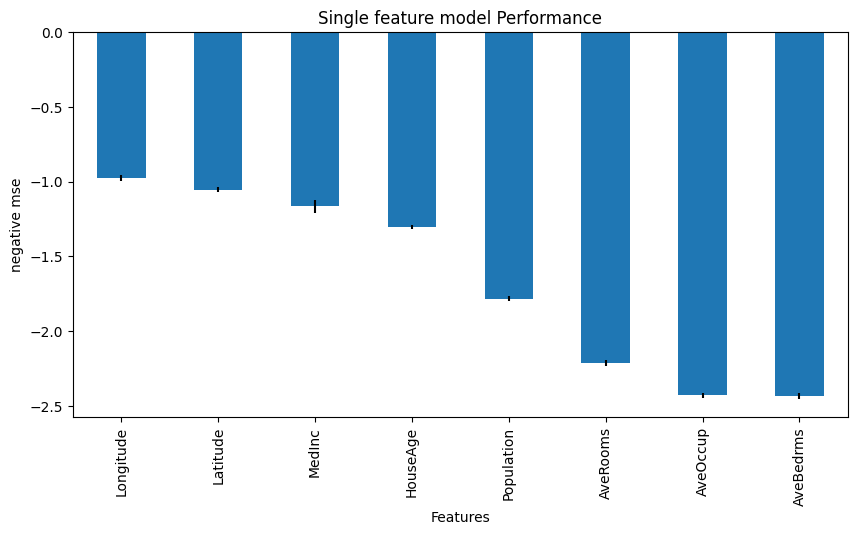

In [17]:
r = pd.concat([
        pd.Series(sel.feature_performance_),
        pd.Series(sel.feature_performance_std_)
    ], axis=1
)
r.columns = ['mean', 'std']

r.sort_values(by="mean", ascending=False)['mean'].plot.bar(
    yerr=[r['std'], r['std']], subplots=True, figsize=(10,5))

plt.title("Single feature model Performance")
plt.ylabel('negative mse')
plt.xlabel('Features')
plt.show()

In [18]:
# drop features

X_train_t = sel.transform(X_train)
X_test_t = sel.transform(X_test)

X_train_t.shape, X_test_t.shape

((15480, 4), (5160, 4))

## Manual

In [19]:
# here we store the mse values
mse_values = []

# iterate over each variable
for feature in X_train.columns:

    # train a decision tree
    clf = DecisionTreeRegressor(random_state=0)
    clf.fit(X_train[feature].to_frame(), y_train)

    # make a prediction
    y_scored = clf.predict(X_test[feature].fillna(0).to_frame())

    # determine the mse and store it
    mse_values.append(mean_squared_error(y_test, y_scored))


# display the result
mse_values[0:10]

[np.float64(1.1895059201655),
 np.float64(1.2936868384687787),
 np.float64(2.1619855195998774),
 np.float64(2.2993323904987784),
 np.float64(1.6449156583299118),
 np.float64(2.413230964239309),
 np.float64(1.0023595654456663),
 np.float64(0.9584366389417938)]

Text(0.5, 1.0, 'Single feature model performance')

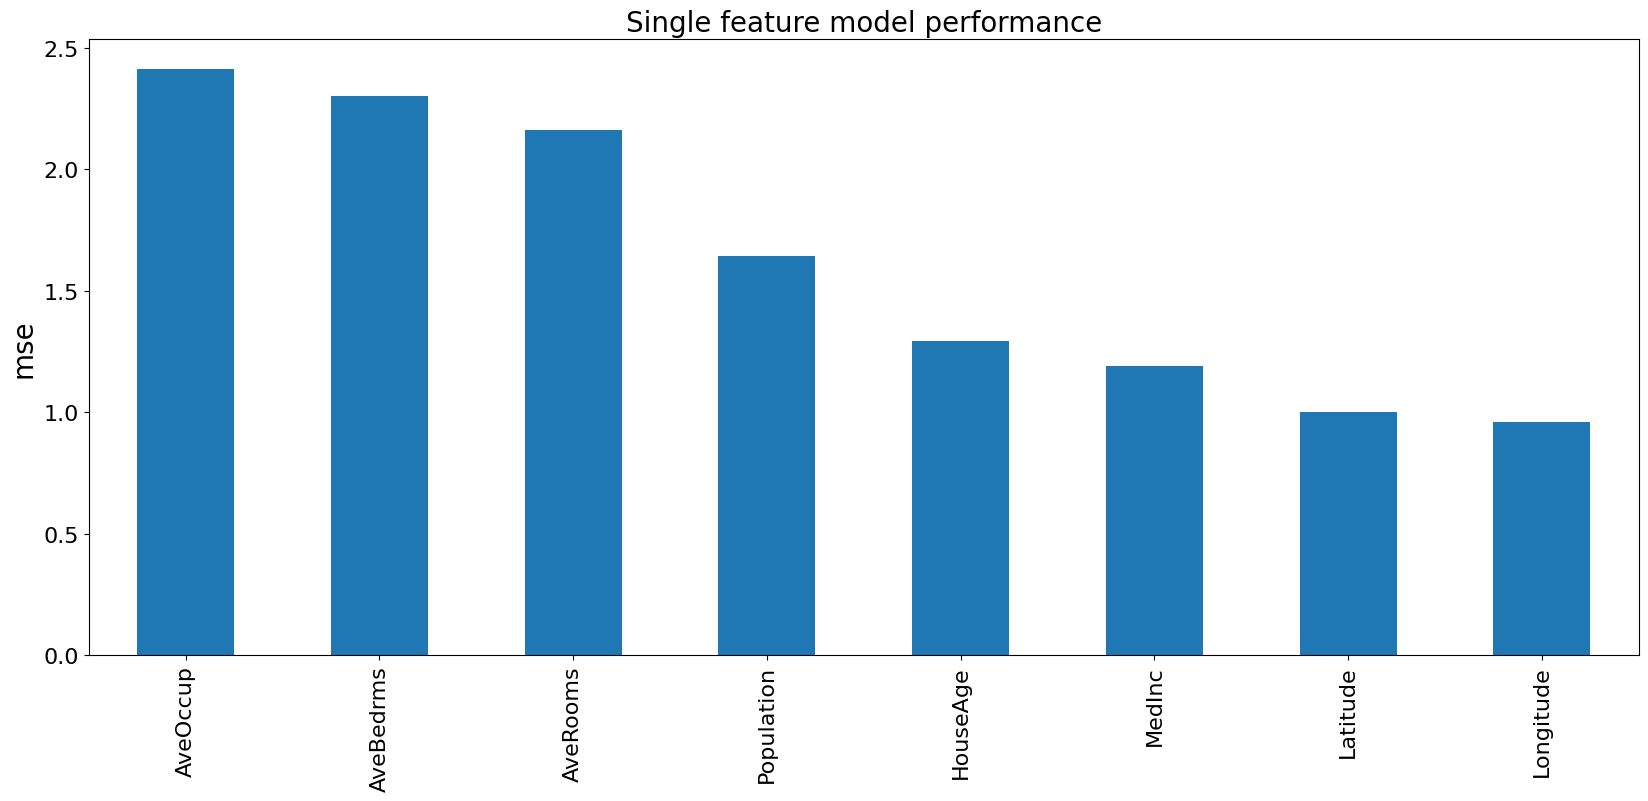

In [20]:
# now let's:

# 1) capture the mse values in a pandas series
# 2) add the variable names in the index
# 3) sort the features based on the mse
# 4) and make a var plot

mse_values = pd.Series(mse_values)
mse_values.index = X_train.columns
mse_values.sort_values(ascending=False).plot.bar(figsize=(20,8), fontsize=16)
plt.ylabel('mse', fontsize=20)
plt.title('Single feature model performance', fontsize=20)

Remember that for regression, the smaller the mse, the better the model performance is.

In [21]:
# select features with mse bigger than 
# the mean mse of all features

selected_features = mse_values[mse_values < np.mean(mse_values)].index

selected_features

Index(['MedInc', 'HouseAge', 'Latitude', 'Longitude'], dtype='object')

In [22]:
# select features in the dataframes

X_train = X_train[selected_features]
X_test = X_test[selected_features]

X_train.shape, X_test.shape

((15480, 4), (5160, 4))